In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

bold_start = '\033[1m'
underline_start = '\033[4m'
bu_end = '\033[0m'

In [2]:
def click_btn(clickable):
    for btn in clickable:
        try:
            btn.click()
        except:
            pass

## Project data
The entire dataset I'm using in this project is scraped from https://growdiaries.com/, as one of the significant weed-growing communities in the world, it holds a large amount of data. Each row represents a data point, each column represents one of the diary features.

### Step 1:
How to get the details from all these diaries? <br>
I started with a naive approach, trying to load 10K of diaries using the website UI wasn't successful. So I looked deeply into the query made each time more diaries are added. Using Postman (API requests tool), I realized that the query has a limit of 2K diaries and a starting point and count of how many rows the server should retrieve to the user. Adding on top of it is the fact that I can always be blocked from the website side.
With those conclusions I decided to download the entire HTML pages that the query returns with 2K chunks, using it I scraped 10K links of grow diaries into my first database.

In [3]:
# startpoint = 0
# count = 2000
# prefix_url = "https://growdiaries.com/explore"

# service = Service('./chromedriver.exe')
# op = webdriver.ChromeOptions()
# # op.add_argument('--headless')
# elements = []
# url_df = pd.DataFrame()

In [4]:
# driver = webdriver.Chrome(service=service, options=op)
# while startpoint < 10000:
#     query = f"?action=loadpage&category=all&tags=harvested&start={startpoint}&count={count}&undefined=&ajax=true&ust=9c824c5a63187dd5f579502e26ac3594c3dbb8752fd954432a4d6e1b0ff2e41f8654e9f3"
#     final_url = prefix_url + query
#     driver.get(final_url)
#     elements= driver.find_elements(By.XPATH, "//a[@class='name']")
#     startpoint += count
#     for element in elements:
#         temp_df = pd.DataFrame({"DiaryName": [element.text], "Url": [element.get_attribute('href')]})
#         url_df = pd.concat([url_df, temp_df], ignore_index=True)
    
# driver.quit()


In [5]:
# url_df.to_csv("Diary Links.csv", index=False)

### Step 2:
Now, when having the links for my desired database, I need to start collecting the raw data from each diary. As the first action toward the real data, my decision was to include the following as features:
diary_name<br> strain<br> strains_company<br> light_watt<br> nutrients<br> watering<br> soil<br> germination<br> grow_techniques<br>grow_room_size<br> weeks_to_harvest<br> num_of_plants<br> likes<br>comments<br> views<br> bud_dry_weight<br> bud_wet_weight

Using likes, comments, and views may help to increase/decrease the reliability of the data point.<br>
The method used to scrape the data is XPATH, it have conditional filtering and I found it as the perfect way to reach every selector I needed.

Highly recommand on: https://devhints.io/xpath for understanding and creating xpath queries

<b>Note: To make it esaier, I saved each time 1K of data in a file</b>

In [6]:
url_df = pd.read_csv("Diary Links.csv")

In [7]:
# driver = webdriver.Chrome(service=service, options=op)
# count = 2000
# const = 1000
# while count < 10000:
#     det_df = pd.DataFrame()
#     for j, url in enumerate(url_df["Url"][count:count+const]):
#         driver.get(url)
#         driver.maximize_window()
#         clickable = driver.find_elements(By.XPATH, "//div[@class='btn_less']")
#         click_btn(clickable)
#         report_items = driver.find_elements(By.XPATH, "//div[contains(@class,'report_items')]//*[@class='info']")
#         outcome = driver.find_elements(By.XPATH, "//div[contains(@class,'parameters_item')]")
#         likes = driver.find_element(By.XPATH, "//div[@class='report_statistic']//div[.//@class='icon-leaf-like']")
#         comments = driver.find_element(By.XPATH, "//div[@class='report_statistic']//div[.//@class='icon comment']")
#         views = driver.find_element(By.XPATH, "//div[@class='report_statistic']//div[.//@class='icon eye']")
#         d = {"diary_name": url_df['DiaryName'].loc[count+j], "strain": "", "strains_company":"", "light_watt": "", "nutrients": "", "watering": "", "soil": "", "germination": "", 'grow_techniques': "", "grow_room_size": "",
#         "weeks_to_harvest": "", "num_of_plants": "","likes": likes.text, "comments": comments.text,"views": views.text,"bud_dry_weight": "", "bud_wet_weight": ""}

        # for i, item in enumerate(report_items):
        #     try:
        #         text = item.text
        #         texts = text.split("\n")
        #         if i == 0:
        #             d["strain"] = texts[0]
        #             d['strains_company'] = texts[1]
        #         elif "LED" in text:
        #             d['light_watt'] += text.replace("\n", " ") + ","
        #         elif "Nutrients" in text:
        #             d['nutrients'] += texts[0] +","
        #         elif "Watering" in text:
        #             d['watering'] = texts[0]
        #         elif "Soil" in text or "Grow" in text:
        #             d['soil']+= text.replace("\n", " ")+","
        #         elif "Germination" in text:
        #             d['germination'] = texts[0]
        #         elif text.find("Week") > 0 and len(texts[0]) > 1:
        #             d['grow_techniques'] += texts[0] + ","
        #         elif text.find("Tent") > 0:
        #             d['grow_room_size'] = texts[0]
        #     except:
        #         pass
        # for i, details in enumerate(outcome):
        #     try:
        #         text = details.text
        #         texts = text.split("\n")
        #         if i == 0:
        #             d["weeks_to_harvest"] = texts[1]
        #         elif "BUD WET WEIGHT" in text:
        #             d['bud_wet_weight']= texts[1]
        #         elif "BUD DRY WEIGHT" in text:
        #             d['bud_dry_weight']= texts[1]
        #         elif "NUMBER OF PLANTS HARVESTED" in text:
        #             d['num_of_plants'] = texts[1].split(" ")[0]
        #         elif "TOTAL LIGHT POWER" in text:
        #             d['light_watt'] = texts[1]
        #         elif "GROW ROOM" in text:
        #             d['grow_room_size']= texts[1]
        #     except:
        #         pass
        # det_df = pd.concat([det_df,pd.DataFrame(d, index=[0])], ignore_index=True)
    # det_df.to_csv(f"Data_{count}_{count+const}.csv", index=False)
    # count += const

# driver.quit()

Connecting all files to one csv file:

In [8]:
# count = 0
# const = 1000
# full_df = pd.DataFrame()
# while count < 10000:
#     full_df = pd.concat([full_df, pd.read_csv(f"Data_{count}_{count+const}.csv")])
#     count += const
# full_df.to_csv("GrowDiariesRowData.csv", index=False)

### Initial analysis and data refinement: 
<small>Nulls: np.nan/NaN/None/NA</small><br>
Strating with testing which one of the dry/wet bud weight have less null values and set it as the target variable. <br>
After, I was looking for the number of null values in each feature nd wrote it into a dictionery, that's the way to find out the features contains null and how many.

In [9]:
full_df = pd.read_csv("GrowDiariesRowData.csv")
full_df['bud_dry_weight'].isna().sum(), full_df['bud_wet_weight'].isna().sum()

(5676, 4091)

In [10]:
full_df = full_df.drop("bud_dry_weight", axis=1)

In [11]:
# Showing all the features with nulls
def count_nulls(df):
    null_dict = {}
    for i in df.columns:
        if df[i].isnull().values.any():
            null_dict[i]=df[i].isnull().sum()
    return sorted(null_dict.items(), key=lambda x: x[1])
# Code reuse from: https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe, https://www.codingem.com/python-sort-dictionary/,

count_nulls(full_df)

[('diary_name', 1),
 ('strain', 2),
 ('strains_company', 2),
 ('weeks_to_harvest', 3),
 ('watering', 489),
 ('soil', 858),
 ('light_watt', 1462),
 ('num_of_plants', 1621),
 ('nutrients', 2074),
 ('grow_techniques', 2397),
 ('grow_room_size', 3675),
 ('germination', 3995),
 ('bud_wet_weight', 4091)]

In [12]:
full_df = full_df.dropna(subset=['bud_wet_weight', 'grow_room_size', 'num_of_plants', 'light_watt'])
count_nulls(full_df), full_df.shape

([('watering', 117),
  ('soil', 252),
  ('nutrients', 560),
  ('grow_techniques', 864),
  ('germination', 1474)],
 (4218, 16))

The other features but gremination can be filled with the median, different category or any rational way that fits the each feature. For the germination I will look for the unique values and try to figure it out from it.

In [13]:
full_df['germination'].value_counts()

germination
Paper Towel              1001
Glass Of Water            647
Directly In Substrate     542
Other                     255
Peat Pellet               217
Rockwool Cube              82
Name: count, dtype: int64

In [14]:
full_df = full_df.drop("germination", axis=1)

As I see it, we have more null values than unique values so I'll drop it.

In [15]:
null_feat = dict(count_nulls(full_df)).keys()
null_feat

dict_keys(['watering', 'soil', 'nutrients', 'grow_techniques'])

In [16]:
# Code reuse: https://stackoverflow.com/questions/58994588/how-can-i-add-the-counts-to-the-histogram-plot
def get_feature_hist(df, cols, figsize=(10,10), rotation=0):
    fig, ax = plt.subplots(1, len(cols))
    for i, col in enumerate(cols):
        if len(cols) > 1:
            axis = ax[i]
        else:
            axis = ax
        col_vals = full_df[col].value_counts()
        bins = range(len(col_vals)+1)
        ticks = range(len(col_vals))
        labelist =[x[:15]+ "..." if len(x) > 15 else x for x in col_vals.keys()]
        df[col].hist(grid=False, bins=bins, align='left', figsize=figsize, xrot=rotation)
        axis.set_xticks(ticks, labelist, size='small')
        for b, n in enumerate(col_vals):
            axis.text(b-(0.1*len(str(n)))/2,  n+15, str(int(n)))


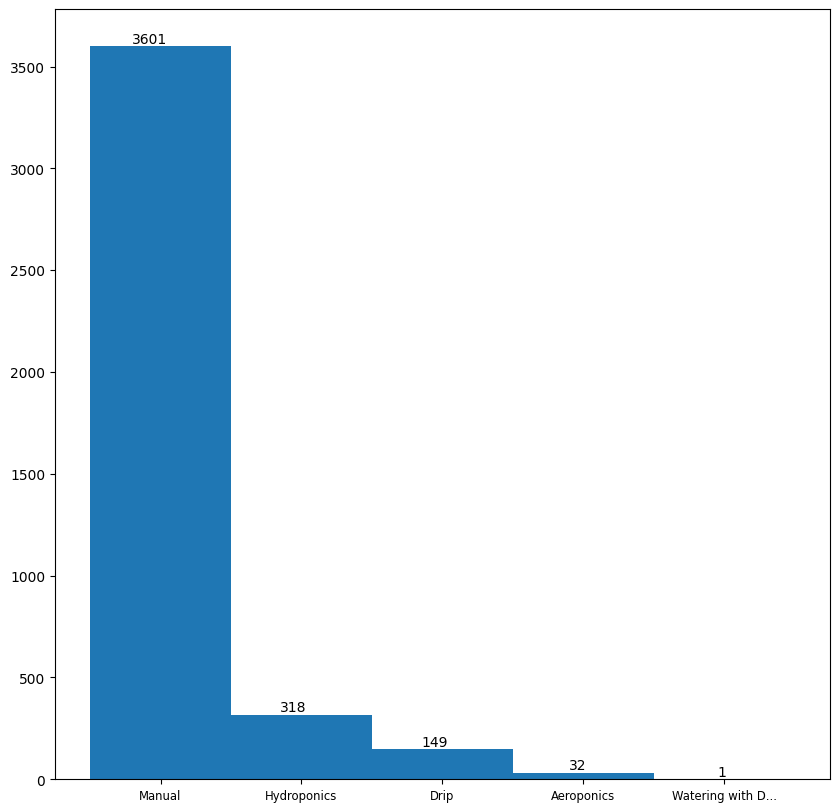

In [17]:
get_feature_hist(full_df, ['watering'])

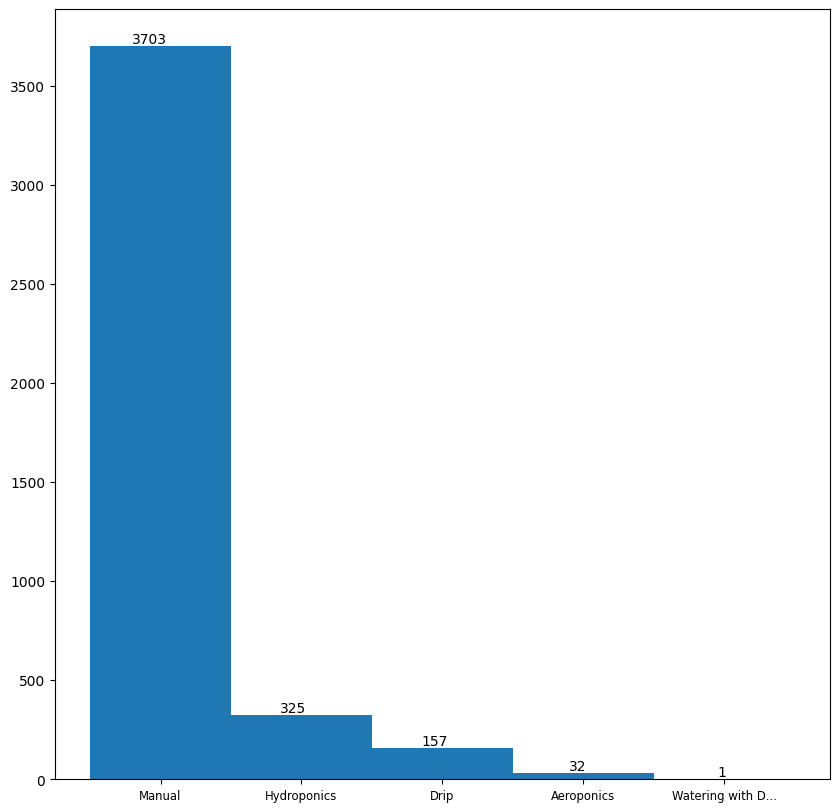

In [18]:
# filling with the forward fill
full_df['watering'] = full_df['watering'].fillna(method='ffill')
get_feature_hist(full_df,['watering'])

In [19]:
count_nulls(full_df)

[('soil', 252), ('nutrients', 560), ('grow_techniques', 864)]

In [20]:
def before_after_fill(df, col, method, val = None):
    """
    Shows the differences in the values apperance before and after filling the null values
    return: the feature without nulld
    """
    print("Before:\n",df[col].value_counts()[:10])
    if method == 'ffill':
        new_col =df[col].fillna(method=method)
    elif method == 'zeros':
        new_col = df[col].fillna(0)
    elif method == 'value' and val:
        new_col = df[col].fillna(val)

    print("\nAfter:\n", new_col.value_counts()[:10])
    return new_col

In [21]:
# filling with the forward fill
full_df['nutrients'] = before_after_fill(full_df,['nutrients'], 'ffill')

Before:
 nutrients                 
General Hydroponics (GHE),    293
Advanced Nutrients,           280
BioBizz,                      220
Green Buzz Nutrients,          99
Fox Farm,                      89
Green House Feeding,           81
PLAGRON.,                      75
Canna,                         65
Bio Tabs,                      40
Top Crop,                      39
Name: count, dtype: int64

After:
 nutrients                 
General Hydroponics (GHE),    329
Advanced Nutrients,           313
BioBizz,                      259
Fox Farm,                     110
Green Buzz Nutrients,         108
Green House Feeding,           86
PLAGRON.,                      83
Canna,                         71
Top Crop,                      47
Bio Tabs,                      46
Name: count, dtype: int64


In [22]:
# Missing values were filled using the most frequent value
full_df['soil'] = before_after_fill(full_df,['soil'], 'value', full_df['soil'].mode()[0])

Before:
 soil                                                           
Soil Grow Medium,                                                  997
Soil Grow Medium,Perlite Grow Medium,                              408
Coco Coir Grow Medium,Perlite Grow Medium,                         383
Coco Coir Grow Medium,                                             131
Soil Grow Medium,Perlite Grow Medium,Coco Coir Grow Medium,         96
Expanded Clay Grow Medium,                                          67
Soil Grow Medium,Coco Coir Grow Medium,Perlite Grow Medium,         60
Soil Grow Medium,Coco Coir Grow Medium,                             59
Soil Grow Medium,Perlite Grow Medium,Expanded Clay Grow Medium,     51
Mineral Wool Grow Medium,                                           48
Name: count, dtype: int64

After:
 soil                                                           
Soil Grow Medium,                                                  1249
Soil Grow Medium,Perlite Grow Medium,         

In [23]:
# A grower might not apply any grow technique so the null values will be replaced by zeros
full_df['grow_techniques'] = before_after_fill(full_df,['grow_techniques'], 'zeros')

Before:
 grow_techniques         
LST,Defoliation,            384
LST,                        303
Defoliation,                292
Topping,LST,Defoliation,    149
Topping,                    142
Defoliation,LST,            121
Topping,Defoliation,        101
LST,Topping,Defoliation,     66
SoG,                         39
Topping,LST,                 39
Name: count, dtype: int64

After:
 grow_techniques         
0                           864
LST,Defoliation,            384
LST,                        303
Defoliation,                292
Topping,LST,Defoliation,    149
Topping,                    142
Defoliation,LST,            121
Topping,Defoliation,        101
LST,Topping,Defoliation,     66
ScrOG,                       39
Name: count, dtype: int64


In [24]:
full_df.isna().all()

diary_name          False
strain              False
strains_company     False
light_watt          False
nutrients           False
watering            False
soil                False
grow_techniques     False
grow_room_size      False
weeks_to_harvest    False
num_of_plants       False
likes               False
comments            False
views               False
bud_wet_weight      False
dtype: bool

Now, there are no null values in the dataset, now it is ready to convert it

In [25]:
print(full_df.shape)
full_df.head()


(4218, 15)


,diary_name,strain,strains_company,light_watt,nutrients,watering,soil,grow_techniques,grow_room_size,weeks_to_harvest,num_of_plants,likes,comments,views,bud_wet_weight
0,#CannapediaGrowersCup4th,Runtz,Zamnesia Seeds,215 watt,"Advanced Nutrients,General Hydroponics (GHE),",Manual,"Soil Grow Medium,Coco Coir Grow Medium,Perlite...","Transplant,Transplantation,Defoliation,Repelle...",1,18,1.0,50,20,950,1130.00
9,Знакомство с Ухтой,Bad Guy,Custom Breeder & Strain,300 watt,"Advanced Nutrients,General Hydroponics (GHE),",Manual,"Keva с биогумусом Grow Medium,Навоз Grow Medium,","Topping,Лалипапинг,Main-Lining,Defoliation,LST...",0.8,17,1.0,29,21,319,431.00
10,Jive S-2 (Auto) R-2,Caramella Auto,Expert Seeds,1100 watt,"Superbud,",Manual,"Super living soil Grow Medium,","SoG,FIMing,LST,Topping,Defoliation,HST,Main-Li...",1.83,10,2.0,12,0,750,650.00
13,Wedding Cake Autoflower,Wedding Cake Autoflower,ILGM,150 watt,"General Hydroponics (GHE),Botanicare,True Plan...",Hydroponics,"Mineral Wool Grow Medium,Expanded Clay Grow Me...","Defoliation,LST,Topping,",0.26,13,1.0,26,12,554,822.14
20,Mommas Meet 12/12,ShiskaBerry,Barney'S Farm,300 watt,"Gaia Green,Maxicrop,Down To Earth,Xtreme Garde...",Manual,"CoolGrows GT 48x48x80,Soil Grow Medium,",0,4.88,27,1.0,40,12,356,226.80


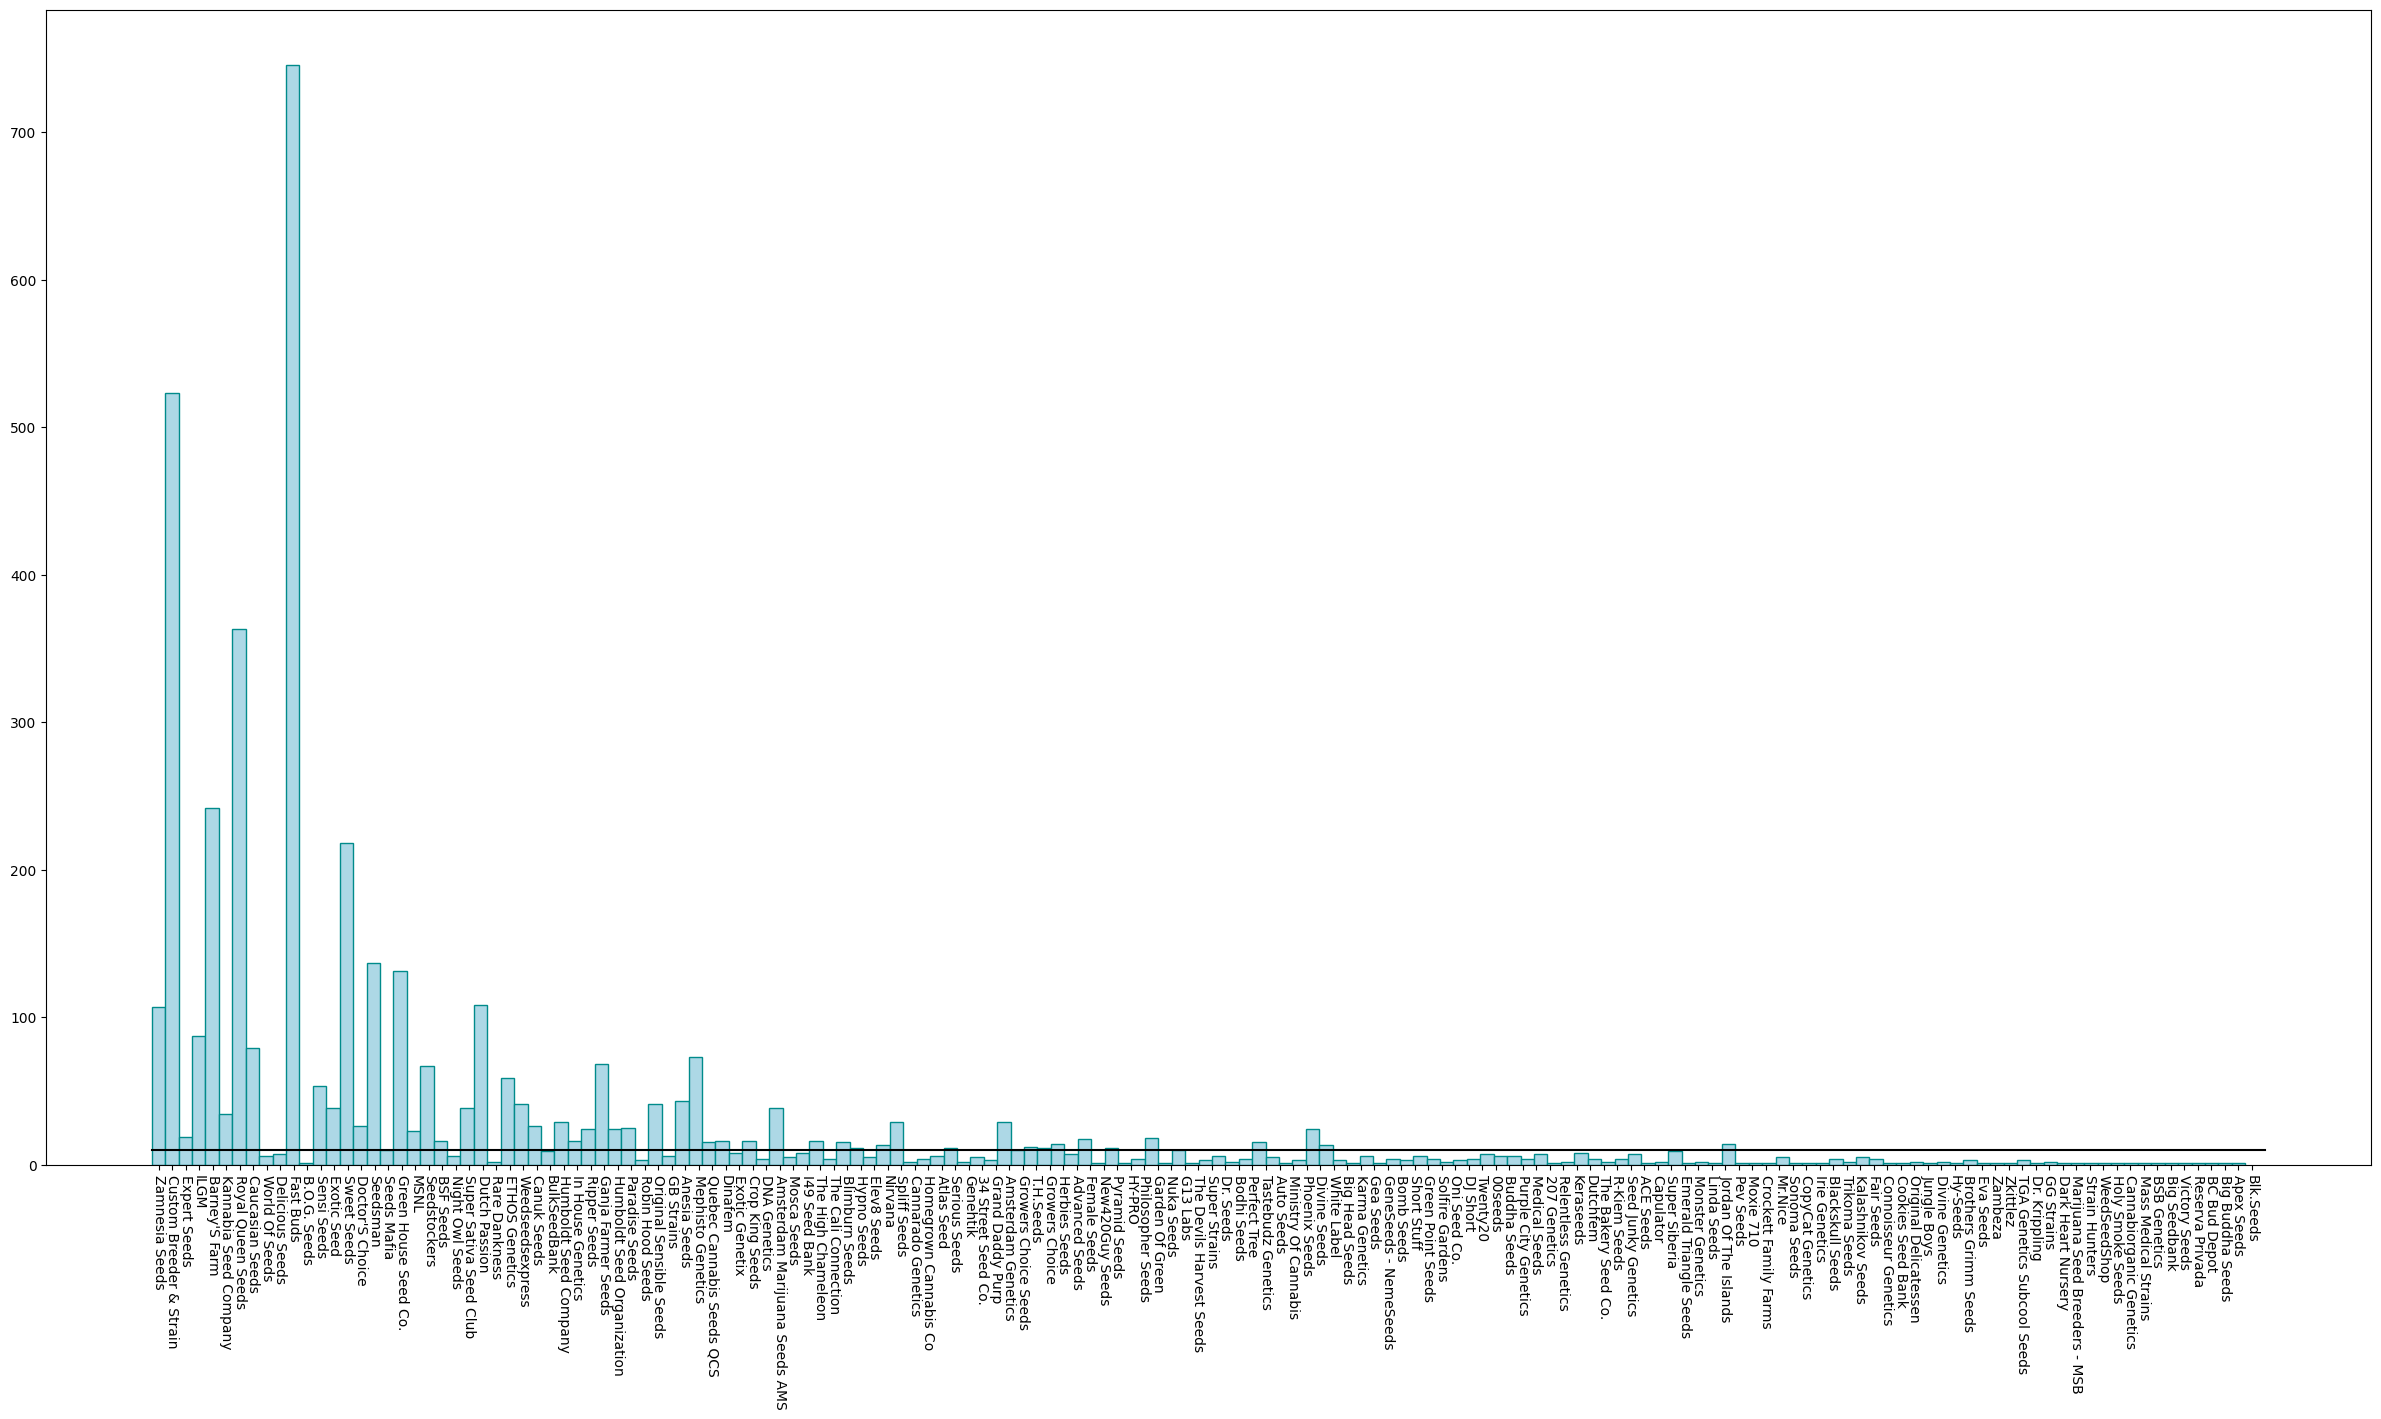

In [26]:
# The line shows the threshold (10) 
bins = full_df['strains_company'].value_counts().count()
full_df['strains_company'].hist(figsize=(30,15), xrot=-90, edgecolor='darkcyan', bins=bins, grid=False, align='left', color='lightblue')
plt.plot([-0.5, bins], [10, 10], color="black", lw=1.5)

In [27]:
# If the company appears more than 10 times it gets a unique value, otherwise it gets 1
companies_list = full_df['strains_company'].value_counts()[full_df['strains_company'].value_counts() > 10]
companies_dict = {comp: i+2 for i, comp in enumerate(reversed(companies_list.keys()))}
for comp in full_df['strains_company'].value_counts()[full_df['strains_company'].value_counts() <= 10].keys():
    companies_dict[comp] = 1
full_df['strains_company'] =full_df['strains_company'].map(companies_dict)

<Axes: >

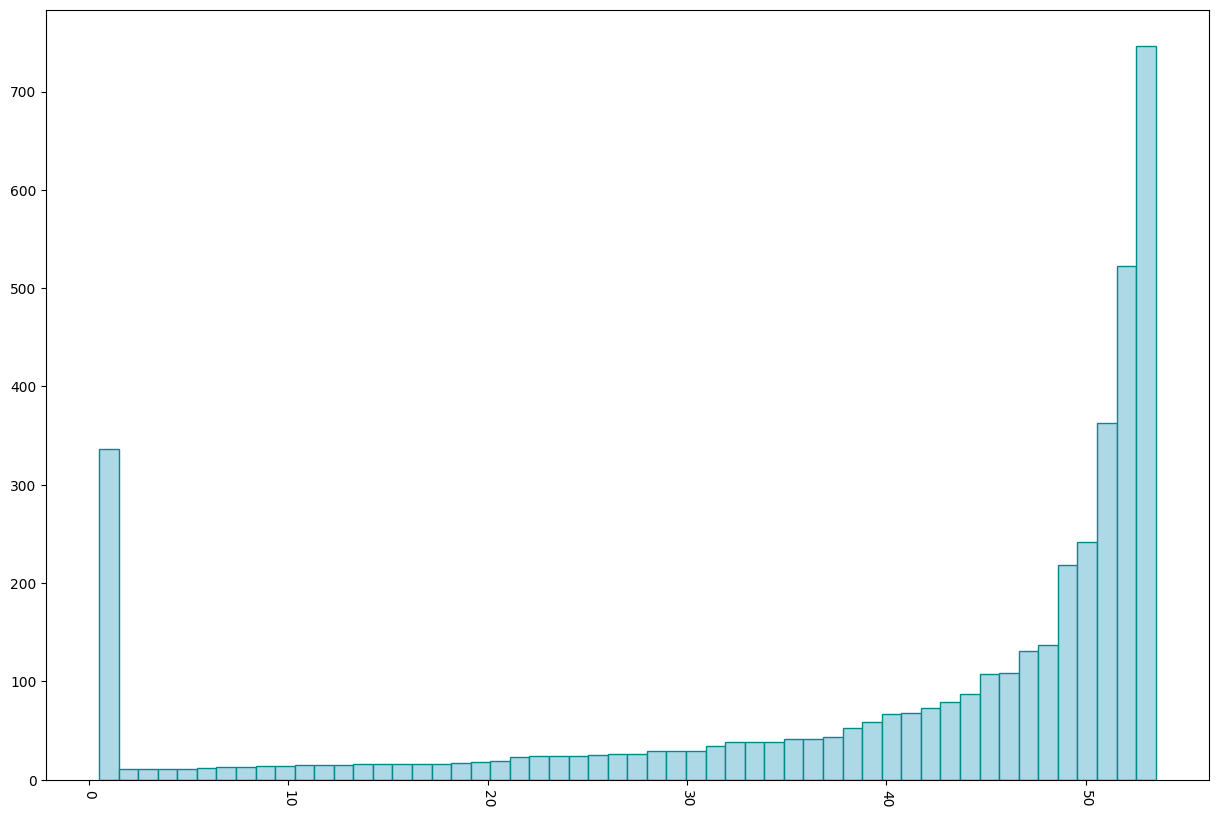

In [28]:
bins = full_df['strains_company'].value_counts().count()
full_df['strains_company'].hist(figsize=(15,10), xrot=-90, edgecolor='darkcyan', bins=bins, grid=False, align='left', color='lightblue')


### ADD BOLD TO THE NUMBERS HERE 

In [29]:
print("The number of strains in the data", full_df['strain'].value_counts().count())
print("\nThe number of strains with 5 or more appearances in the data",full_df['strain'].value_counts()[full_df['strain'].value_counts() > 5].count())

The number of strains in the data 1872

The number of strains with 5 or more appearances in the data 147


In [30]:
strain_list = full_df['strain'].value_counts()[full_df['strain'].value_counts() > 5]
strain_dict = {comp: i+2 for i, comp in enumerate(reversed(strain_list.keys()))}
for strain in full_df['strain'].value_counts()[full_df['strain'].value_counts() <= 5].keys():
    strain_dict[strain] = 1
full_df['strain'] =full_df['strain'].map(strain_dict)

In [31]:
wat_list = []
for wat in full_df['light_watt']:
    power = wat.replace(" watt", "")
    if power.isnumeric():
        wat_list.append(power)
    else:
        power1 = re.findall("[1-9]{1}[0-9]+W", power)
        if not power1:
            power1 = re.findall("[1-9]{1}[0-9]+", power)
        wat_list.append(power1)
        
full_df.insert(4, "light_new", wat_list)

In [32]:
nutrients_len_list = []
# count the number of nutrients used
for nut in full_df['nutrients']:
    nut_count = len(nut.split(","))-1
    nutrients_len_list.append(nut_count)

full_df.insert(6, "nutrients_count", nutrients_len_list)

In [33]:
watering_dict = {watering: i for i, watering in enumerate(reversed(full_df['watering'].value_counts().keys()))}
full_df['watering'] =full_df['watering'].map(watering_dict)